# Model Evaluation & Refinement (Desarrollo y Evaluación del Modelo)

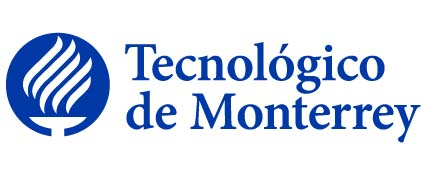

## TC4029 Ciencia y analítica de datos (Gpo 10)


### Armando Bringas Corpus (A01200230)

In [1]:
#Ajustes de preferencia
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context ='notebook', ticks =True, grid =False) 

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

Lectura de los datos, para este ejercio estamos optando por abrir el 'dataset' proporcionado para la actividad de regresiones.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


Remoción de variables categóricas

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

Ploteo de Heatmap para obersvar la correlación entre las variables

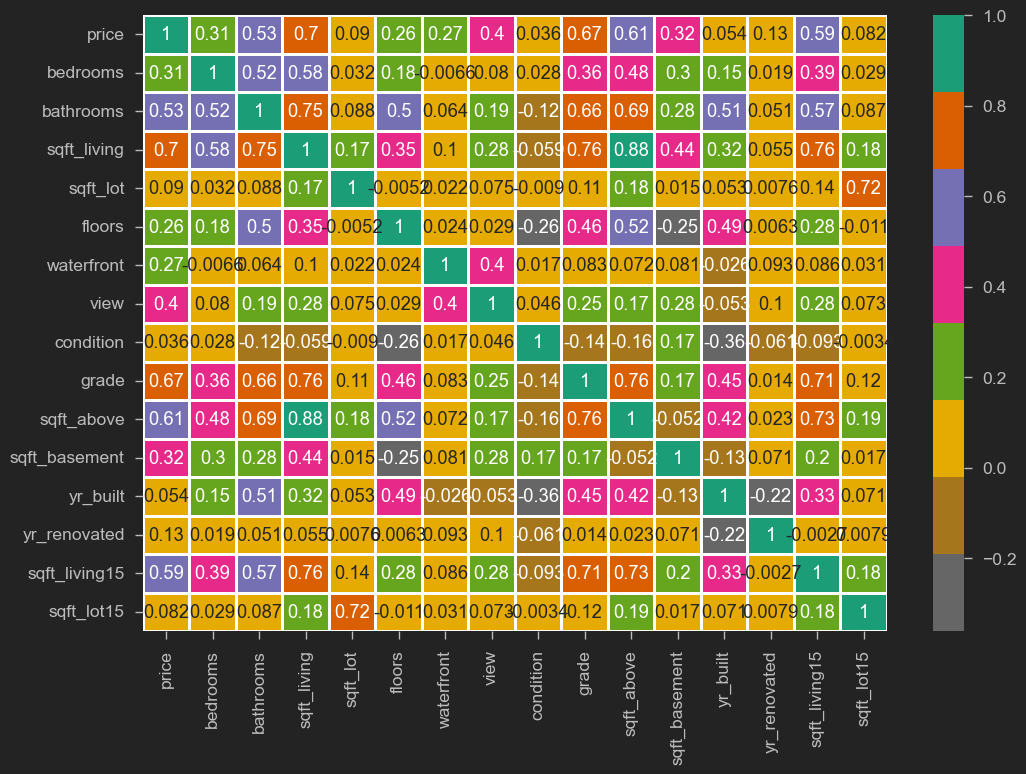

In [6]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

## Funciones para el ploteo de datos

In [7]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    # ax1 = sns.histplot(RedFunction, kde=True, fill=False, color="r", label=RedName)
    
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    # ax2 = sns.histplot(BlueFunction, kde=True, fill=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [8]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    # plt.ylim([-10000, 60000])
    plt.ylabel('Y')
    plt.legend()

## Parte 1: Entrenamiento y Prueba

In [9]:
# Separación de variables X e Y
columns = df.columns.drop('price')
features = columns
label = ['price']

X = df[features]
y = df[label]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 2162
number of training samples: 19451


### Regresión Lineal

In [11]:
# Creación de objeto
lre=LinearRegression()

In [12]:
# Utilizaremos la variables '' para ajustar el modelo
lre.fit(x_train[['sqft_living']], y_train)

LinearRegression()

In [13]:
# Cálculo del error R-squared en los datos de prueba
lre.score(x_test[['sqft_living']], y_test)

0.48489043226442774

In [14]:
# COmparando R-squared
lre.score(x_train[['sqft_living']], y_train)

0.4938445479924307

Es ligeramente más pequeño el error R^2 en los datos de prueba

Cálculo de la R^2 utilizando el 40% del dataset

In [15]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.4, random_state=0)
lre.fit(x_train1[['sqft_living']],y_train1)
lre.score(x_test1[['sqft_living']],y_test1)

0.5038132932066877

## Puntaje de Validación Cruzada (Cross Validation Score)

In [16]:
# Validación cruzada en 4 'folds'
Rcross = cross_val_score(lre, X[['sqft_living']], y, cv=4)
Rcross

array([0.48405393, 0.49342812, 0.4945384 , 0.49661067])

Cálculo del promedio y desviación estándard del fold

In [17]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.49215778141759514 and the standard deviation is 0.004816164814374254


También podemos usar el error cuadrado negativo

In [18]:
-1 * cross_val_score(lre,X[['sqft_living']], y,cv=4,scoring='neg_mean_squared_error')

array([7.40300278e+10, 6.78275022e+10, 6.31573009e+10, 6.85353219e+10])

Utilización del 'cross validation' para predecir valores de y

In [19]:
yhat = cross_val_predict(lre,X[['sqft_living']], y,cv=4)
yhat[0:5]

array([[289097.80337707],
       [676049.91415715],
       [174960.84983762],
       [506236.39791554],
       [428289.2101325 ]])

## Parte 2: Overfitting, Underfitting y Selección de Modelo

Realizaremos un regresión lineal múltiple, en este caso seleccionamos los 4 parámetros con mayor correlación con base a lo observado en nuestro 'heatmap'

In [20]:
lr = LinearRegression()
lr.fit(x_train[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']], y_train)

LinearRegression()

Predicción utilizando los datos de entrenamiento

In [21]:
yhat_train = lr.predict(x_train[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']])
yhat_train[0:5]

array([[898916.40282821],
       [472697.51978394],
       [342810.04018082],
       [462420.75957092],
       [436744.79515318]])

Predicción utilizando los datos de prueba

In [22]:
yhat_test = lr.predict(x_test[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']])
yhat_test[0:5]

array([[782736.88168716],
       [398359.7859195 ],
       [956878.2932932 ],
       [696686.54924267],
       [263776.5854092 ]])

Procedemos con la evaluación  del modelo con respecto a los valores predecidos del los datos de entrenamiento.

In [23]:
import warnings
warnings.filterwarnings("ignore")

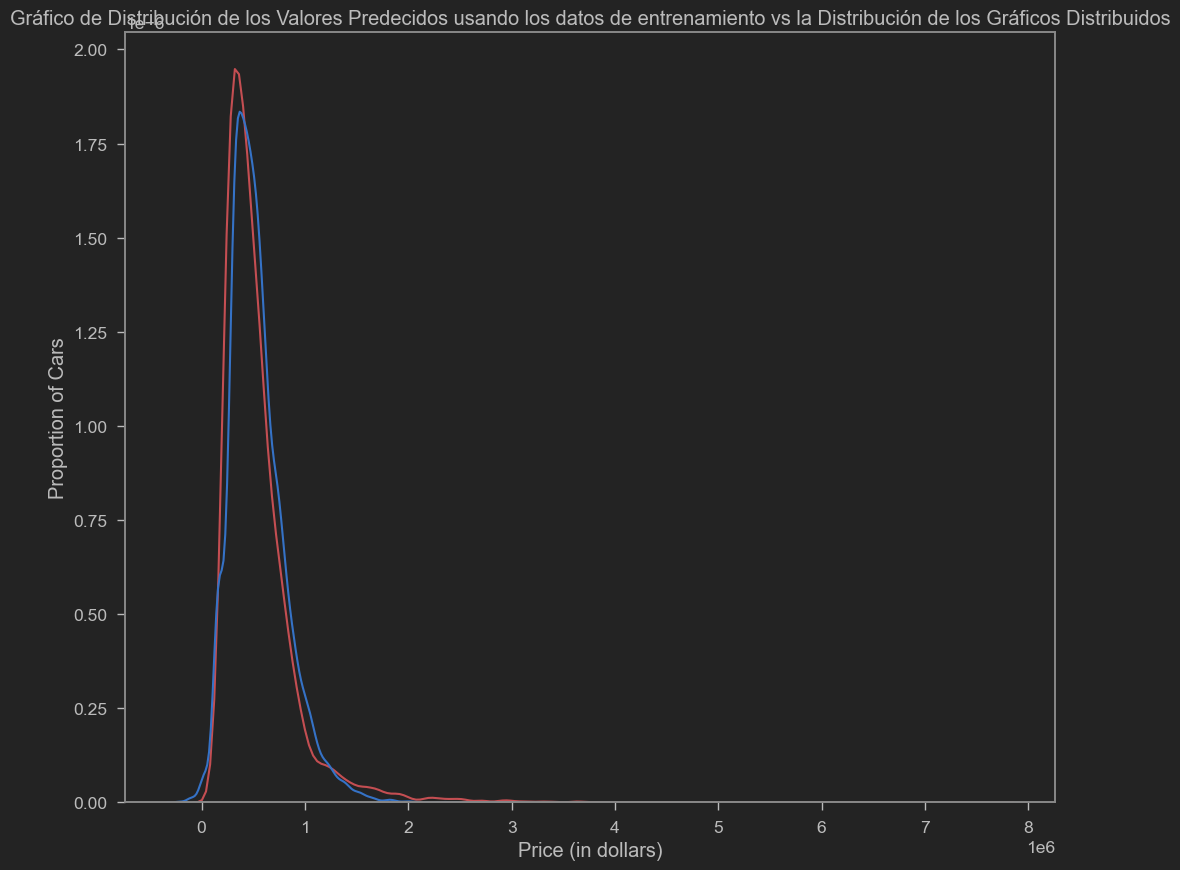

In [24]:
Title = "Gráfico de Distribución de los Valores Predecidos usando los datos de \
entrenamiento vs la Distribución de los Gráficos Distribuidos"
DistributionPlot(y_train, yhat_train, "Valores Actuales (Entrenamiento)",
                 "Values Predecidos (Entrenamiento)", Title)

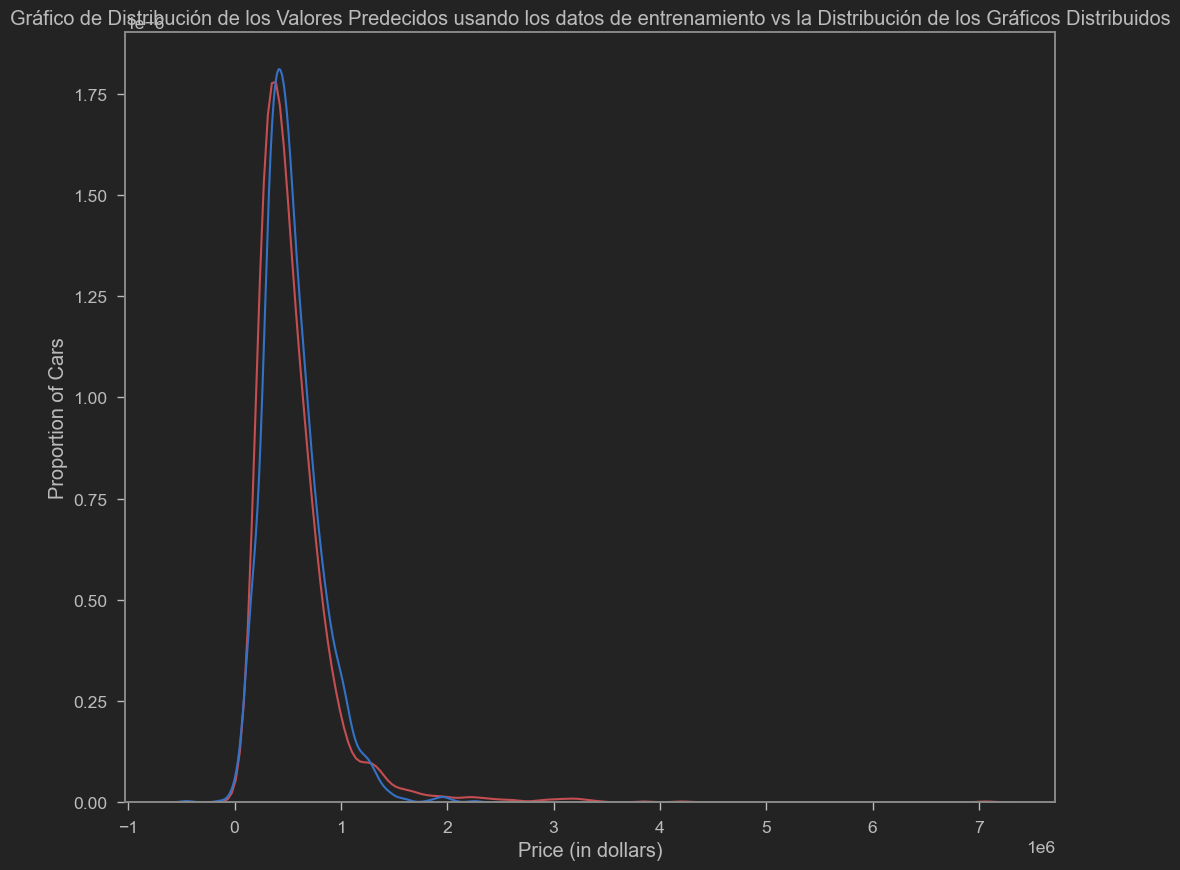

In [25]:
Title = "Gráfico de Distribución de los Valores Predecidos usando los datos de \
entrenamiento vs la Distribución de los Gráficos Distribuidos"
DistributionPlot(y_test, yhat_test, "Valores Actuales (Prueba)",
                 "Values Predecidos (Prueba)", Title)

In [26]:
warnings.filterwarnings("always")

### Overfitting

Volveremos a generar los datos de entrenamiento y de prueba, en esta ocasión tomando en cuenta un 40% de los datos

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 8646
number of training samples: 12967


Vamos a realizar una transformación polinomial del atributo de 'sqft_living'

In [28]:
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(x_train[['sqft_living']])
x_test_pr = pr.fit_transform(x_test[['sqft_living']])
pr

PolynomialFeatures(degree=3)

In [29]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [30]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([[675979.44703905],
       [410479.2187469 ],
       [564131.48096083],
       [540140.33486462],
       [378387.03502281]])

Tomamos los primeros 5 datos predecido y los comparamos contra los datos actuales

In [31]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [[675979.44703905]
 [410479.2187469 ]
 [564131.48096083]
 [540140.33486462]]
True values: [[ 459000.]
 [ 445000.]
 [1057000.]
 [ 732350.]]


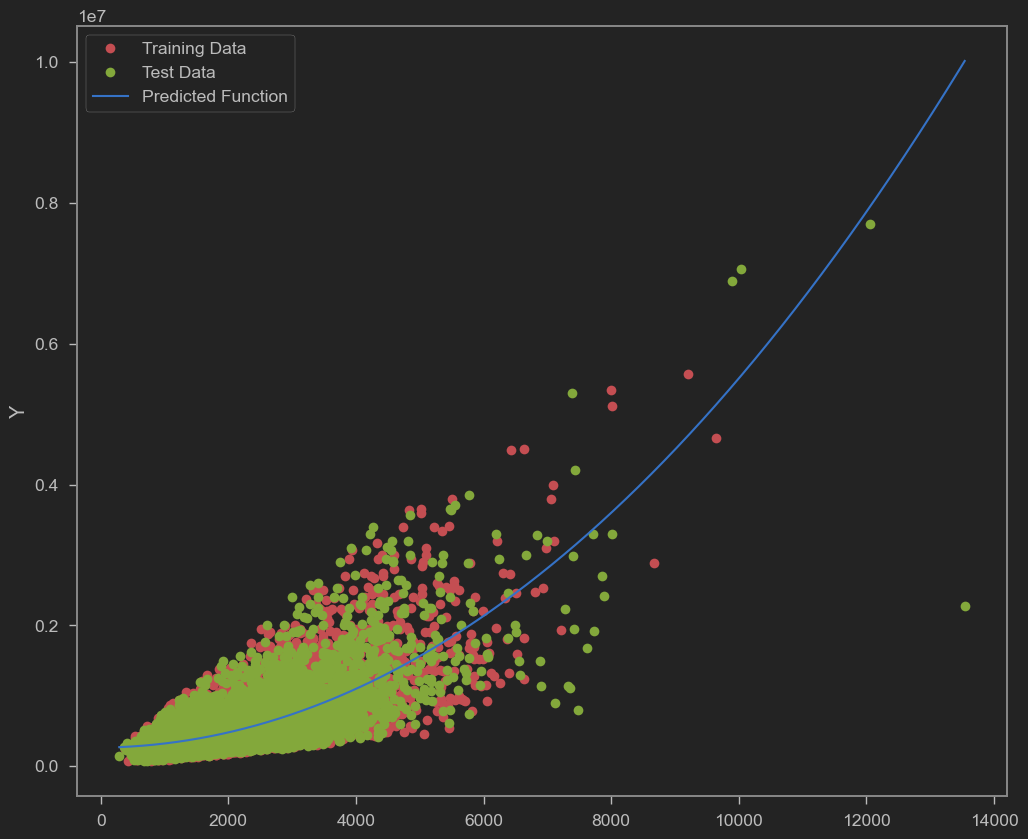

In [32]:
PollyPlot(x_train[['sqft_living']], x_test[['sqft_living']], y_train, y_test, poly,pr)

Cálculo del error r^2 de los datos de entrenamiento

In [33]:
poly.score(x_train_pr, y_train)

0.5343496907923212

Cálculo del error r^2 de los datos de prueba

In [34]:
poly.score(x_test_pr, y_test)

0.5166852823838503

Observación de cómo cambia R^2 si cambiamos el orden de los polinomios

Text(0.5, 1.0, 'R^2 Using Test Data')

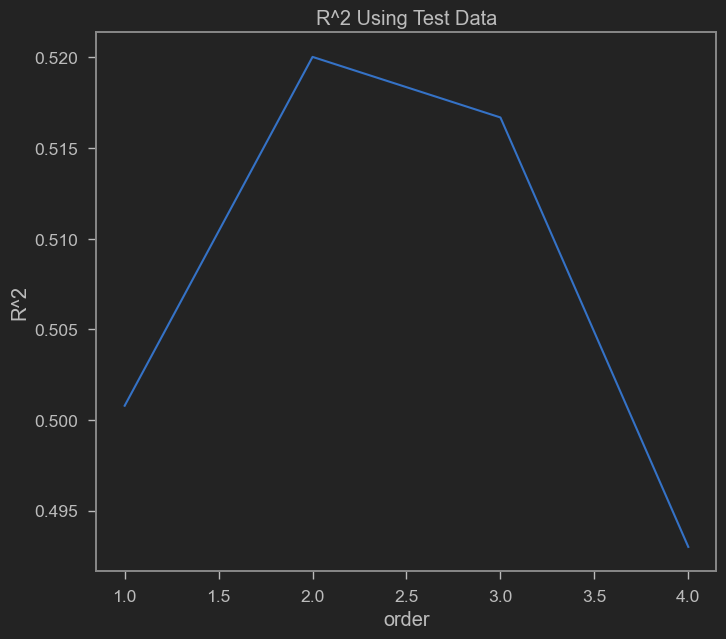

In [35]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['sqft_living']])
    x_test_pr = pr.fit_transform(x_test[['sqft_living']])    
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

## Parte 3 - Regresión Ridge

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [37]:
pr=PolynomialFeatures(degree=3)
x_train_pr=pr.fit_transform(x_train[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']])
x_test_pr=pr.fit_transform(x_test[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']])

In [38]:
RigeModel = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1, solver='cholesky', random_state=42))
])

In [39]:
RigeModel.fit(x_train_pr, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=1, random_state=42, solver='cholesky'))])

In [40]:
yhat = RigeModel.predict(x_test_pr)
yhat

array([[ 495471.64134957],
       [ 673271.62899721],
       [1121758.75360956],
       ...,
       [ 243797.33217009],
       [ 476591.44405265],
       [ 347424.21300109]])

In [41]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [[ 495471.64134957]
 [ 673271.62899721]
 [1121758.75360956]
 [1696582.27243027]]
test set : [[ 365000.]
 [ 865000.]
 [1038000.]
 [1490000.]]


Función para seleccionar valor de alpha para minimizar el error

In [42]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  0%|                                                    | 0/1000 [00:00<?, ?it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.7524e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  0%|                                                    | 0/1000 [00:00<?, ?it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.55048e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  0%|                                                    | 0/1000 [00:00<?, ?it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.32572e-25): result may not be

  2%|▊                                          | 20/1000 [00:00<00:22, 43.84it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.86058e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  2%|█                                          | 25/1000 [00:00<00:22, 44.13it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.9381e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  2%|█                                          | 25/1000 [00:00<00:22, 44.13it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.01562e-24): result may not be

  5%|██                                         | 47/1000 [00:01<00:19, 48.49it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.64363e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  5%|██                                         | 47/1000 [00:01<00:19, 48.49it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.72115e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  5%|██                                         | 47/1000 [00:01<00:19, 48.49it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.79868e-24): result may not b

  6%|██▊                                        | 65/1000 [00:01<00:18, 51.33it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.42668e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  7%|███                                        | 71/1000 [00:01<00:18, 50.91it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.5042e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  7%|███                                        | 71/1000 [00:01<00:18, 50.91it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.58173e-24): result may not be

  9%|███▊                                       | 89/1000 [00:01<00:18, 49.99it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.20973e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  9%|███▊                                       | 89/1000 [00:01<00:18, 49.99it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.28725e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 10%|████                                       | 95/1000 [00:01<00:18, 49.01it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.36478e-24): result may not b

 11%|████▋                                     | 112/1000 [00:02<00:17, 49.65it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=8.99278e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 11%|████▋                                     | 112/1000 [00:02<00:17, 49.65it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.07031e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 12%|████▉                                     | 118/1000 [00:02<00:17, 49.76it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.14783e-24): result may not b

 14%|█████▋                                    | 135/1000 [00:02<00:16, 51.08it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.07758e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 14%|█████▋                                    | 135/1000 [00:02<00:16, 51.08it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.08534e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 14%|█████▉                                    | 141/1000 [00:02<00:16, 51.28it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.09309e-23): result may not b

 16%|██████▋                                   | 159/1000 [00:03<00:15, 52.66it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.25589e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 16%|██████▋                                   | 159/1000 [00:03<00:15, 52.66it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.26364e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 16%|██████▋                                   | 159/1000 [00:03<00:15, 52.66it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.27139e-23): result may not b

 18%|███████▋                                  | 182/1000 [00:03<00:16, 50.10it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.43419e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 18%|███████▋                                  | 182/1000 [00:03<00:16, 50.10it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.44195e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 18%|███████▋                                  | 182/1000 [00:03<00:16, 50.10it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.4497e-23): result may not be

 21%|████████▋                                 | 206/1000 [00:04<00:15, 49.86it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.6125e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 21%|████████▋                                 | 206/1000 [00:04<00:15, 49.86it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.62025e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 21%|████████▋                                 | 206/1000 [00:04<00:15, 49.86it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.628e-23): result may not be a

 23%|█████████▋                                | 230/1000 [00:04<00:15, 50.12it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.7908e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 23%|█████████▋                                | 230/1000 [00:04<00:15, 50.12it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.79856e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 23%|█████████▋                                | 230/1000 [00:04<00:15, 50.12it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.80631e-23): result may not be

 25%|██████████▌                               | 252/1000 [00:05<00:15, 47.46it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.96911e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 25%|██████████▌                               | 252/1000 [00:05<00:15, 47.46it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.97686e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 25%|██████████▌                               | 252/1000 [00:05<00:15, 47.46it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.98461e-23): result may not b

 27%|███████████▌                              | 274/1000 [00:05<00:15, 47.51it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.14741e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 27%|███████████▌                              | 274/1000 [00:05<00:15, 47.51it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.15517e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 27%|███████████▌                              | 274/1000 [00:05<00:15, 47.51it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.16292e-23): result may not b

 30%|████████████▌                             | 298/1000 [00:06<00:13, 50.99it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.32572e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 30%|████████████▌                             | 298/1000 [00:06<00:13, 50.99it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.33347e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 30%|████████████▌                             | 298/1000 [00:06<00:13, 50.99it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.34122e-23): result may not b

 32%|█████████████▌                            | 322/1000 [00:06<00:13, 50.77it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.50402e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 32%|█████████████▌                            | 322/1000 [00:06<00:13, 50.77it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.51178e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 32%|█████████████▌                            | 322/1000 [00:06<00:13, 50.77it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.51953e-23): result may not b

 35%|██████████████▌                           | 346/1000 [00:06<00:12, 51.94it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.68233e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 35%|██████████████▌                           | 346/1000 [00:06<00:12, 51.94it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.69008e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 35%|██████████████▌                           | 346/1000 [00:07<00:12, 51.94it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.69783e-23): result may not b

 36%|███████████████▎                          | 364/1000 [00:07<00:12, 50.03it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.86063e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 37%|███████████████▌                          | 370/1000 [00:07<00:14, 44.66it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.86839e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 37%|███████████████▌                          | 370/1000 [00:07<00:14, 44.66it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.87614e-23): result may not b

 39%|████████████████▍                         | 390/1000 [00:07<00:13, 45.67it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.03894e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 39%|████████████████▍                         | 390/1000 [00:07<00:13, 45.67it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.04669e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 39%|████████████████▍                         | 390/1000 [00:08<00:13, 45.67it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.05444e-23): result may not b

 42%|█████████████████▍                        | 415/1000 [00:08<00:12, 45.60it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.21725e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 42%|█████████████████▍                        | 415/1000 [00:08<00:12, 45.60it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.225e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 42%|█████████████████▍                        | 415/1000 [00:08<00:12, 45.60it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.23275e-23): result may not be 

 44%|██████████████████▎                       | 435/1000 [00:08<00:12, 46.82it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.39555e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 44%|██████████████████▎                       | 435/1000 [00:08<00:12, 46.82it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.4033e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 44%|██████████████████▍                       | 440/1000 [00:08<00:11, 47.19it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.41106e-23): result may not be

 46%|███████████████████▏                      | 458/1000 [00:09<00:10, 50.00it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.57386e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 46%|███████████████████▏                      | 458/1000 [00:09<00:10, 50.00it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.58161e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 46%|███████████████████▏                      | 458/1000 [00:09<00:10, 50.00it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.58936e-23): result may not b

 48%|████████████████████▏                     | 481/1000 [00:09<00:10, 50.53it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.75216e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 48%|████████████████████▏                     | 481/1000 [00:09<00:10, 50.53it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.75991e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 48%|████████████████████▏                     | 481/1000 [00:09<00:10, 50.53it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.76767e-23): result may not b

 50%|█████████████████████▏                    | 505/1000 [00:10<00:09, 50.98it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.93047e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 50%|█████████████████████▏                    | 505/1000 [00:10<00:09, 50.98it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.93822e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 50%|█████████████████████▏                    | 505/1000 [00:10<00:09, 50.98it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.94597e-23): result may not b

 53%|██████████████████████▏                   | 529/1000 [00:10<00:09, 49.50it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.10877e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 53%|██████████████████████▏                   | 529/1000 [00:10<00:09, 49.50it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.11652e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 53%|██████████████████████▏                   | 529/1000 [00:10<00:09, 49.50it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.12428e-23): result may not b

 55%|███████████████████████                   | 550/1000 [00:11<00:09, 47.69it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.28708e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 55%|███████████████████████                   | 550/1000 [00:11<00:09, 47.69it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.29483e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 56%|███████████████████████▎                  | 555/1000 [00:11<00:09, 47.29it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.30258e-23): result may not b

 57%|████████████████████████▏                 | 575/1000 [00:11<00:09, 46.15it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.46538e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 57%|████████████████████████▏                 | 575/1000 [00:11<00:09, 46.15it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.47313e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 57%|████████████████████████▏                 | 575/1000 [00:11<00:09, 46.15it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.48089e-23): result may not b

 60%|█████████████████████████                 | 596/1000 [00:12<00:08, 48.37it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.64369e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 60%|█████████████████████████                 | 596/1000 [00:12<00:08, 48.37it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.65144e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 60%|█████████████████████████                 | 596/1000 [00:12<00:08, 48.37it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.65919e-23): result may not b

 62%|█████████████████████████▉                | 619/1000 [00:12<00:07, 49.12it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.82199e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 62%|█████████████████████████▉                | 619/1000 [00:12<00:07, 49.12it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.82974e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 62%|██████████████████████████▏               | 624/1000 [00:12<00:09, 41.54it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.8375e-23): result may not be

 64%|██████████████████████████▉               | 641/1000 [00:13<00:07, 47.87it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.0003e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 64%|██████████████████████████▉               | 641/1000 [00:13<00:07, 47.87it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.00805e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 65%|███████████████████████████▏              | 647/1000 [00:13<00:07, 49.56it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.0158e-23): result may not be 

 67%|████████████████████████████              | 668/1000 [00:13<00:07, 47.20it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.1786e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 67%|████████████████████████████              | 668/1000 [00:13<00:07, 47.20it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.18635e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 67%|████████████████████████████              | 668/1000 [00:13<00:07, 47.20it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.19411e-23): result may not be

 69%|████████████████████████████▉             | 688/1000 [00:14<00:06, 48.24it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.35691e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 69%|████████████████████████████▉             | 688/1000 [00:14<00:06, 48.24it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.36466e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 69%|█████████████████████████████             | 693/1000 [00:14<00:06, 48.19it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.37241e-23): result may not b

 71%|█████████████████████████████▉            | 714/1000 [00:14<00:05, 47.97it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.53521e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 71%|█████████████████████████████▉            | 714/1000 [00:14<00:05, 47.97it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.54296e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 71%|█████████████████████████████▉            | 714/1000 [00:14<00:05, 47.97it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.55072e-23): result may not b

 73%|██████████████████████████████▋           | 732/1000 [00:15<00:05, 50.51it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.71352e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 74%|██████████████████████████████▉           | 738/1000 [00:15<00:05, 49.83it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.72127e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 74%|██████████████████████████████▉           | 738/1000 [00:15<00:05, 49.83it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.72902e-23): result may not b

 76%|███████████████████████████████▋          | 755/1000 [00:15<00:04, 50.31it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.89182e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 76%|███████████████████████████████▉          | 761/1000 [00:15<00:04, 48.22it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.89957e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 76%|███████████████████████████████▉          | 761/1000 [00:15<00:04, 48.22it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.90733e-23): result may not b

 78%|████████████████████████████████▉         | 783/1000 [00:16<00:04, 46.54it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.07013e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 78%|████████████████████████████████▉         | 783/1000 [00:16<00:04, 46.54it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.07788e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 78%|████████████████████████████████▉         | 783/1000 [00:16<00:04, 46.54it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.08563e-23): result may not b

 80%|█████████████████████████████████▋        | 803/1000 [00:16<00:04, 46.46it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.24843e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 80%|█████████████████████████████████▋        | 803/1000 [00:16<00:04, 46.46it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.25619e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 81%|█████████████████████████████████▉        | 808/1000 [00:16<00:04, 46.93it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.26394e-23): result may not b

 83%|██████████████████████████████████▊       | 829/1000 [00:17<00:03, 47.38it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.42674e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 83%|██████████████████████████████████▊       | 829/1000 [00:17<00:03, 47.38it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.43449e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 83%|██████████████████████████████████▊       | 829/1000 [00:17<00:03, 47.38it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.44224e-23): result may not b

 85%|███████████████████████████████████▋      | 849/1000 [00:17<00:03, 46.86it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.60504e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 85%|███████████████████████████████████▋      | 849/1000 [00:17<00:03, 46.86it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.6128e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 85%|███████████████████████████████████▋      | 849/1000 [00:17<00:03, 46.86it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.62055e-23): result may not be

 87%|████████████████████████████████████▌     | 871/1000 [00:17<00:02, 48.27it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.78335e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 87%|████████████████████████████████████▌     | 871/1000 [00:17<00:02, 48.27it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.7911e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 88%|████████████████████████████████████▊     | 877/1000 [00:18<00:02, 49.33it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.79885e-23): result may not be

 89%|█████████████████████████████████████▌    | 894/1000 [00:18<00:02, 48.52it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.96165e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 90%|█████████████████████████████████████▊    | 899/1000 [00:18<00:02, 48.92it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.96941e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 90%|█████████████████████████████████████▊    | 899/1000 [00:18<00:02, 48.92it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.97716e-23): result may not b

 92%|██████████████████████████████████████▋   | 921/1000 [00:18<00:01, 48.28it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.13996e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 92%|██████████████████████████████████████▋   | 921/1000 [00:18<00:01, 48.28it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.14771e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 92%|██████████████████████████████████████▋   | 921/1000 [00:18<00:01, 48.28it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.15546e-23): result may not b

 94%|███████████████████████████████████████▍  | 939/1000 [00:19<00:01, 50.43it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.31826e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 94%|███████████████████████████████████████▋  | 945/1000 [00:19<00:01, 49.29it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.32602e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 94%|███████████████████████████████████████▋  | 945/1000 [00:19<00:01, 49.29it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.33377e-23): result may not b

 96%|████████████████████████████████████████▍ | 962/1000 [00:19<00:00, 50.01it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.49657e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 97%|████████████████████████████████████████▋ | 968/1000 [00:19<00:00, 50.01it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.50432e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 97%|████████████████████████████████████████▋ | 968/1000 [00:19<00:00, 50.01it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.51207e-23): result may not b

 99%|█████████████████████████████████████████▌| 990/1000 [00:20<00:00, 49.73it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.67487e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 99%|█████████████████████████████████████████▌| 990/1000 [00:20<00:00, 49.73it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.68263e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 99%|█████████████████████████████████████████▌| 990/1000 [00:20<00:00, 49.73it/s, Test Score=0.607, Train Score=0.636]C:\Users\bring\anaconda3\envs\tec\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.69038e-23): result may not b

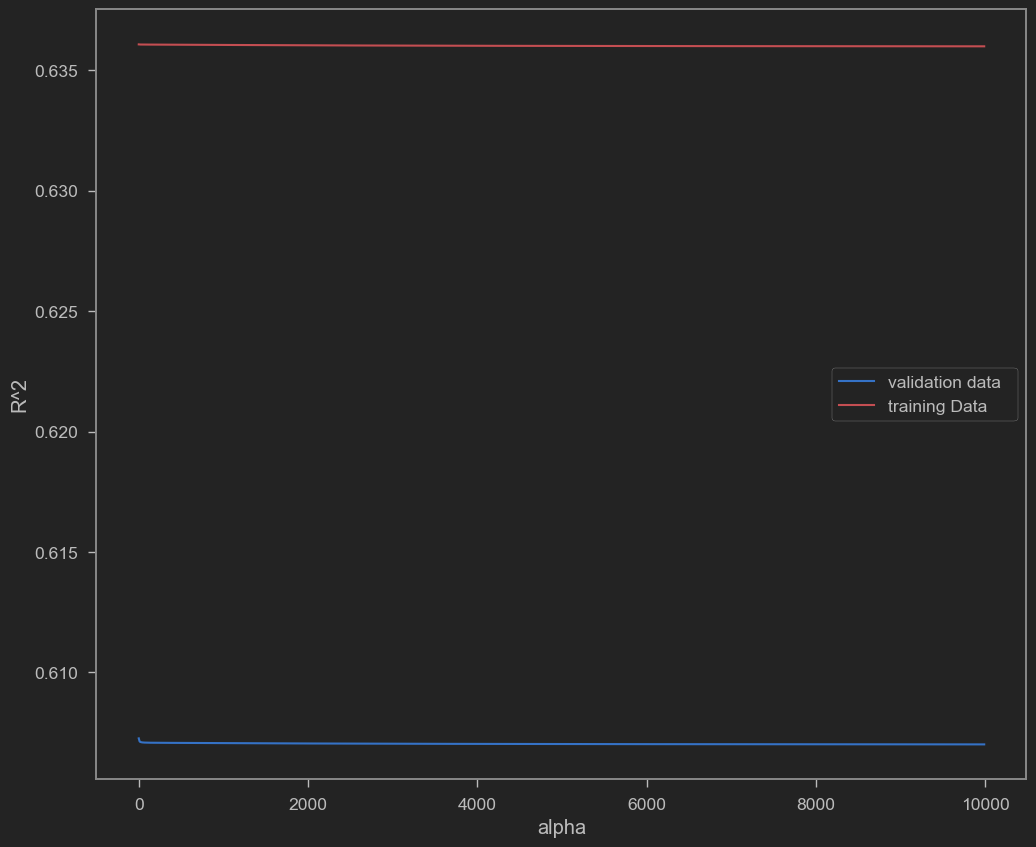

In [43]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()